In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [8]:
# This data set comes from the TReNDS neuroimaging dataset on kaggle, which can be found at:
# https://www.kaggle.com/c/trends-assessment-prediction

# these are the independent variables
df = pd.read_csv("../input/trends-assessment-prediction/loading.csv")
features = list(df.columns[1:])

# these are the dependent variables
labels_df = pd.read_csv("../input/trends-assessment-prediction/train_scores.csv")

df = df.merge(labels_df, on="Id", how="left")
df = df.dropna()


In [9]:
# How a regression tree works: create a step function by learning the optimal boundary between steps
# by minimizing sum of square residuals against every possible boundary in the data
# then use the average value (or a linear regression?) for each step, to calculate the prediction of y
# it's typical to truncate step splitting at steps of size <=20 to prevent overfitting

# How a random forest works: a random forest is a collection of decision trees where the boundaries
# are learned from only a randomly selected subset of k of the possible regressors  at each step,
# on top of the bootstrapped data set. Then take an average of all the trees' predictions.

train_df, test_df = train_test_split(df, test_size=0.33, shuffle=True)

# Create the random forest regressor
# a bootstrapped dataset is sample that was randomly sampled with replacement from some source dataset
model = RandomForestRegressor(n_estimators=100, criterion="mse", bootstrap = True)
model.fit(train_df[features], train_df["age"])

print("Accuracy score of Random Forest Regressor on age in training set (R2)")
print(model.score(train_df[features], train_df["age"]))

Accuracy score of Random Forest Regressor on age in training set (R2)
0.9200544466192798


In [10]:
# Now we can create predictions and evaluate our model

y_predicted = model.predict(test_df[features])

print("Accuracy score of Random Forest Regressor on predicting age in test set (R2)")
print(model.score(test_df[features], test_df["age"]))

Accuracy score of Random Forest Regressor on predicting age in test set (R2)
0.40266156429863786


Text(69.0, 0.5, 'Actual (Age in decades)')

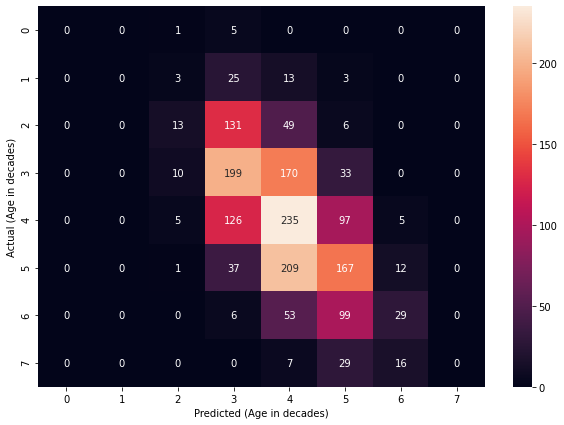

In [11]:
# It would be nice to have a visual of how well we predicted ages, so convert our prediction to a
# classification by decade of age, and plot of confusion matrix to show the accuracy of our prediction
cm = metrics.confusion_matrix(test_df["age"].round(-1).astype(int), y_predicted.round(-1).astype(int))

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted (Age in decades)')
plt.ylabel('Actual (Age in decades)')

In [12]:
###########################################################################################################
#                                     Collaborative Model Comparison                                      #
# After completing our individual projects above, students who used the same kaggle dataset collaborated  #
# to produce a model comparison between these different regression models, which can be shown below:      #
#                                                                                                         #

# run cross validation on my model
seed = 7
scoring = 'r2'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, df[features], df["age"].astype(int), cv=kfold, scoring=scoring)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


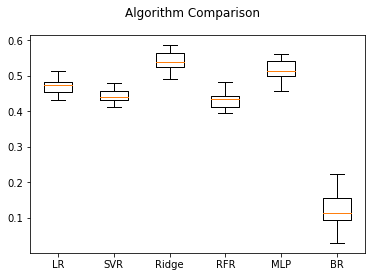

Based on this analysis we determine that the Ridge regression was the most successful at predicting age.


In [15]:
# Compare to the same cross validation produced by other models
# Cross validated results were gathered for every model above and are summarized here:
results = [
    [0.48038686, 0.44722758, 0.47229537, 0.43149557, 0.48267628, 0.47303389,
       0.47288577, 0.43150015, 0.50556724, 0.51195019], # LinearRegression
    [0.4330323 , 0.4415893 , 0.43576118, 0.41260509, 0.45900908,
       0.44424805, 0.4300585 , 0.41139041, 0.47555739, 0.480079  ], #SVR
    [0.5222,0.5109,0.5340,0.4915,0.5440,0.5819,0.5384,0.5855,0.5720,0.5368], #Ridge Regression
    [0.43819714, 0.40940325, 0.45465441, 0.40138206, 0.43437831,
       0.44386384, 0.42308454, 0.39606003, 0.48182481, 0.43259663], #RandomForestRegressor
    [0.48602632, 0.50945147, 0.54282255, 0.51462939, 0.54125916,
        0.50663771, 0.49722094, 0.45733866, 0.53932954, 0.56163937], # MLPRegressor
    [0.02901306, 0.15196958, 0.08661957, 0.1940907 , 0.11258754,
        0.11474175, 0.15555495, 0.10880699, 0.03113268, 0.22320099] # BaggingRegressor
]

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(["LR", "SVR", "Ridge", "RFR", "MLP", "BR"])
plt.show()

print("Based on this analysis we determine that the Ridge regression was the most successful at predicting age.")